# Linear Regression
### In This Notebook
In this notebook we look at: 
- importing data using the ***Pandas*** library,
- creating a scatter plot of the data using the ***MatPlotLib*** library,
- uisng the ***SciPy*** library to fit curves to the data, and 
- using ***Numpy*** to achieve the same results with linear algebra (thus trying to understand how the calculations can be done).

All the examples use a set of data that contains the amount of alcohol in servings of various drinks.

### Your Assignment:
For your assignment you need to
- read carefully through the material that is here,
- find another data set, formatted as a csv file, that you are interested in with at least three variables and 100 entries,
- create a new Jupyter Notebook, and
- using your data, show that you can
  - import the data,
  - plot the data on a scatter plot,
  - use SciPy to fit linear ($y=ax+b$), quadratic ($y=ax^2+bx+c$), and basic exponential models ($y=be^{ax}$),
  - repeat the curve fitting with linear algebra and Numpy, verifying that you get the same results,
  - look at your data and decide if there is a better function that may fit it, then use SciPy or linear algebra to do so, and
  - Add plots of your fitted curves to your data onto the scatter plot.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit

# Import Data and Create a Basic Scatter Plot

## Import Data
Here we use ***Pandas*** to import the data and then turn it into ***NumPy*** arrays.  We can also operate on the arrays as if they are values in order to created new arrays.

In [2]:
df = pd.read_csv('../data/alcohol_calories.csv')
t = np.array(df['Alcohol'])
oz = np.array(df['oz'])
cal = np.array(df['calories'])

# This calculation creates a Numpy array of calories per oz
cal_per_ounce = cal/oz

In [3]:
for drink,cals in zip(t,cal_per_ounce):
    print("A %s has %0.2f calories per ounce"%(drink,cals))

A Beer (light) has 8.58 calories per ounce
A Beer (regular) has 12.75 calories per ounce
A Beer (higher alcohol, craft beers) has 21.67 calories per ounce
A Gin (80 proof) has 64.67 calories per ounce
A Gin (94 proof) has 77.33 calories per ounce
A Rum (80 proof) has 64.67 calories per ounce
A Rum (94 proof) has 77.33 calories per ounce
A Vodka (80 proof) has 64.67 calories per ounce
A Vodka (94 proof) has 77.33 calories per ounce
A Whiskey (80 proof) has 64.67 calories per ounce
A Whiskey (94 proof) has 77.33 calories per ounce
A Coffee liqueur has 106.67 calories per ounce
A Coffee liqueur with cream has 102.67 calories per ounce
A Crème de menthe has 124.00 calories per ounce
A Bloody Mary has 26.67 calories per ounce
A Chocolate martini has 167.20 calories per ounce
A Cosmopolitan has 53.09 calories per ounce
A Daiquiri has 49.82 calories per ounce
A Highball has 13.75 calories per ounce
A Hot buttered rum has 36.50 calories per ounce
A Mai Tai has 61.20 calories per ounce
A Margar

## Create Scatter Plot
The `plt.subplots()` command can be used to create a plot object consisting of a figure and an axis in the figure.  You can also use this to create multiple axes in the same figure.

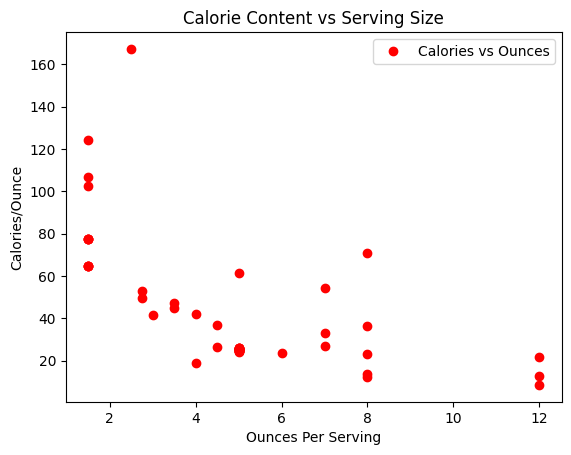

In [4]:
fig,ax = plt.subplots();
scatt_plot, = ax.plot(oz,cal_per_ounce,"ro",label="Calories vs Ounces");
ax.set_title("Calorie Content vs Serving Size");
ax.set_xlabel('Ounces Per Serving');
ax.set_ylabel('Calories/Ounce');
ax.legend()

# Use SciPy Library to Fit Curves

## "Arbitrary" Functions
To fit a curve to data using SciPy, start by creating functions with the appropriate form.  The input includes the variables and coefficients.

In [5]:
# These create function representing arbitray linear and quadratic functions
def arb_linear(x,a,b): return a*x+b
def arb_quad(x,a,b,c): return a*x**2+b*x+c

# try to uncomment and complete this function for an arbitray exponential y=b*e^(ax)
# def arb_exp(x,a,b): return ???

SciPy's curve_fit command takes as input:
- An arbitrary functioon
- A $k\times M$ array of predictor/explanatory data
- A $M$ dimensional array of dependent data

From this it outputs the coefficients to use for the function in order to get the best fit.

In [6]:
lcoef,lcovar = curve_fit(arb_linear, oz, cal_per_ounce)
qcoef,qcovar = curve_fit(arb_quad, oz, cal_per_ounce)

# how would you use the arbitrary exponential function you created to get coefficients?
# ecoef,ecovar=curve_fit(???)


## Adding Curves to the Scatter Plot
Notice that earlier we created a Matplotlib Plot object so now we can add curves to the existing plot without replotting it.

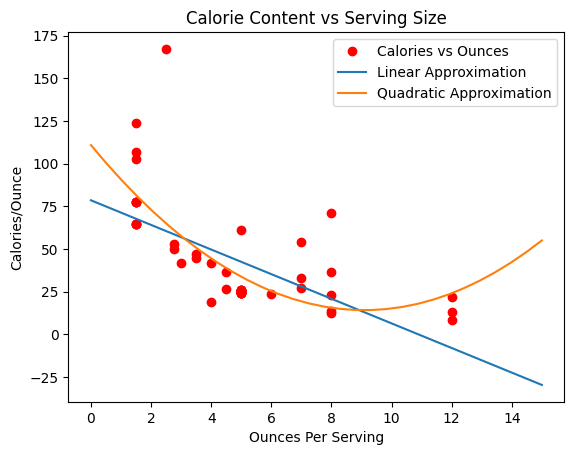

In [7]:
x=np.linspace(0,15,30)
linearApprox, = ax.plot(x,lcoef[0]*x+lcoef[1],label="Linear Approximation");
quadApprox, = ax.plot(x,qcoef[0]*x**2+qcoef[1]*x+qcoef[2],label="Quadratic Approximation");
# add your exponential curve
# exp_approx = ???
ax.legend()
fig

# Repeat with Linear Algebra
Here we look at the sort of calculations that are going on in the background.  We can see that if we apply the linear regression techniques we learned in class we get the same coeficients as ***SciPy***.

## First the Linear Approximation

In [8]:
# Create a matrix of x values including a column ones for the constant term
r, = oz.shape
A = np.column_stack([oz,np.ones(r)])

In [9]:
# Calculate A^TA for regression
M = A.transpose()@A

In [10]:
# Find the inverse of A^TA
Minv = la.inv(M)

In [11]:
# The coefficeints are (A^TA)^-1A^Tb where b is the vector of y values
Minv@A.transpose()@cal_per_ounce

array([-7.21347546, 78.48637416])

In [12]:
# We can see that our result matches SciPy's output
lcoef

array([-7.21347547, 78.48637421])

## Then a Quadratic Approximation

In [13]:
# We can repeat the above stpes, with a slightly differnt matrix, to get 
# coefficients for a quadratic approximation
B = np.column_stack([oz**2,oz,np.ones(r)])
N = B.transpose()@B
Ninv = la.inv(N)
Ninv@B.transpose()@cal_per_ounce

array([  1.17012957, -21.27455405, 110.80080593])

In [14]:
# Again the results match SciPy
qcoef

array([  1.17012957, -21.27455405, 110.80080593])

## Mystery Curve

What type of general curves are being fit to the data in these examples?

In [15]:
C = np.column_stack([np.log(oz),np.ones(r)])
ar,lnbr=la.inv(C.T@C)@C.T@np.log(cal_per_ounce)
br = np.e**lnbr

In [16]:
ae,lnbe = Minv@A.T@np.log(cal_per_ounce)
be = np.e**lnbe

In [17]:
X = np.linspace(0.1,15)

In [18]:
Yr = br*X**ar
Ye = be*np.e**(ae*X)

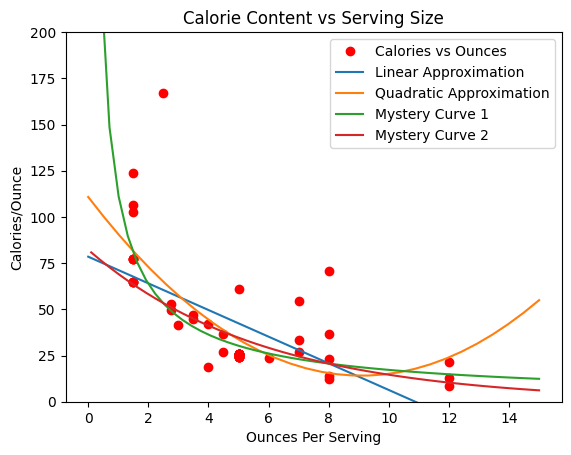

In [19]:
Mystery1, = ax.plot(X,Yr,label="Mystery Curve 1");
Mystery2, = ax.plot(X,Ye,label="Mystery Curve 2");
ax.set_ylim(0,200)
ax.legend()
fig

The graph above is looking kind of crowded.  Below are two different ways to clean it up.  What is the difference between the two approaches? What might be the advantages or disadvantages of each approach?

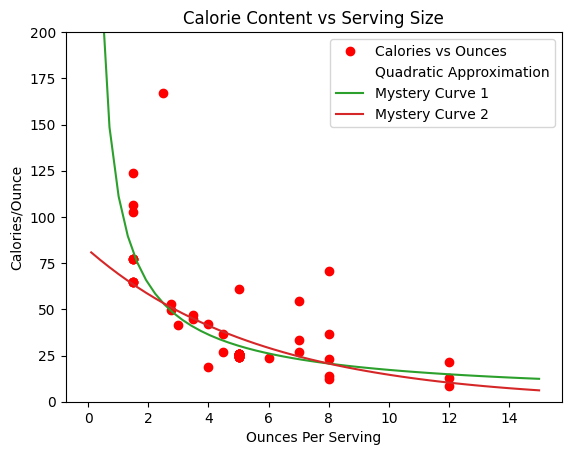

In [20]:
linearApprox.remove()
quadApprox.set_visible(False)
ax.legend()
fig